# Import libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [32]:
#  "Objective function"
def f(x,y):
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

#  Find the global minimum

## Genenrating the values and produce a figure

We will start by generating the x,y values to the pass the value to the objective function to generate the Result.
Moreover, we will produce a contour figure as well as a 3d figure

[[17.25774626 16.95598213 16.63640756 ...  9.11658861  9.16218631
   9.22487203]
 [16.97381987 16.67205575 16.35248117 ...  8.83266223  8.87825993
   8.94094564]
 [16.73563128 16.43386715 16.11429257 ...  8.59447363  8.64007133
   8.70275705]
 ...
 [14.76220185 14.46043772 14.14086315 ...  6.6210442   6.6666419
   6.72932762]
 [15.1129488  14.81118467 14.49161009 ...  6.97179115  7.01738885
   7.08007457]
 [15.49744767 15.19568355 14.87610897 ...  7.35629003  7.40188773
   7.46457344]]


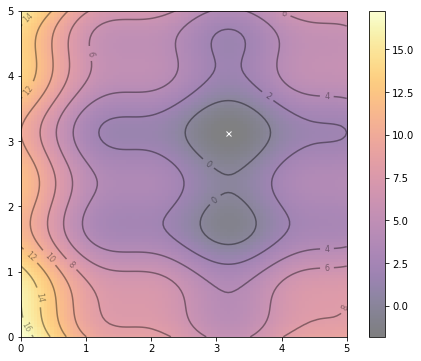

In [33]:
# Contour plot: With the global minimum showed as "X" on the plot
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100))) # Generating the numbers from 0 to 5 equally spaced
z = f(x, y)                    # Calculating the Result of the funciton
print(z)                       # Checking the result of the fucntion
x_min = x.ravel()[z.argmin()]  # Returns the minimum x value (input value)
y_min = y.ravel()[z.argmin()]  # Returns the minimum y value (input value)
plt.figure(figsize=(8,6))      # Set the figure size 
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='inferno', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

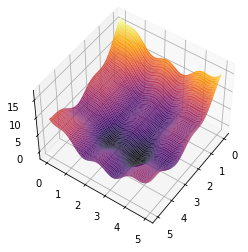

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='inferno', edgecolor='none');

def animate(i):
    ax.view_init(i, 35)
    return ax
    
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("2103134-1.gif", dpi=100, writer="imagemagick")

# Hyper-parameter of the algorithm

We will set the hyper-parameters, but $c_1,c_2$ will be different.

In [29]:
c1 = 0.2
c2 = 0.3
w  = 0.7

# Initialize data

We will need to specifiy the number of particles,
we will need to set the seed, so that the algorithm doesn't use the time of the machine.

In [37]:
# Create particles
n_particles = 25
seed = 120
np.random.seed(seed)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.01
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

print(pbest)
print("-"*50)
print(pbest_obj)
print("-"*50)
print(gbest)
print("-"*50)
print(gbest_obj)

[[3.38977774 2.56479401 3.11852856 2.38571233 2.30129907 4.75432433
  4.922878   4.27211273 2.95545173 1.01598186 1.31180078 0.33207623
  3.23467503 3.59366473 1.75524628 4.76271739 2.97738714 4.97253103
  2.71836772 0.35856314 0.70343342 1.03639161 2.52763704 2.67696465
  2.65727542]
 [1.16455591 3.0275069  3.51445531 0.33314942 1.18338399 0.79478657
  4.86651216 3.55126734 0.41427578 2.74184946 0.71224148 0.53606365
  3.08789309 4.55936374 4.52654184 0.53108263 1.69700971 1.31162147
  1.32317712 0.90236254 0.29296044 4.08360804 2.28370542 3.7574922
  3.93267307]]
--------------------------------------------------
[ 1.8591522  -0.07609313 -0.57834205  6.63528252  4.09831658  7.34008267
  6.43543153  2.87753705  4.5252695   3.73041241  7.46680755 13.72737867
 -1.77955694  2.50544603  4.94410793  7.81857209 -0.66191714  4.39479303
  1.58024376 12.60281557 10.9280329   6.19600648  1.8847205   1.94422311
  2.73723927]
--------------------------------------------------
[3.23467503 3.087893

# Particle swarm optimization

In [38]:
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Reporting results

PSO found best solution at f([3.18515199 3.12979673])=-1.808352035530865
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


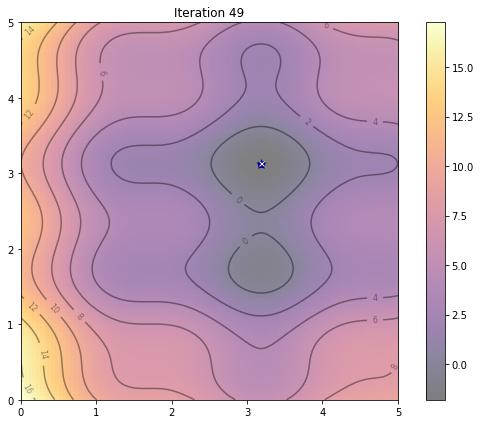

In [39]:
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='inferno', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)


def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
# IMPORTANT - RENAME THE GIF WITH YOUR ID.
anim.save("2103134.gif", dpi=120, writer="imagemagick")

print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))